In [100]:

from sklearn import model_selection, metrics
from sklearn.linear_model import LinearRegression, RANSACRegressor
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')
import pandas as pd

In [101]:
def Read_data(data):
     return data.head()

data = pd.read_csv(r"C:\Users\mk744\OneDrive - Poornima University\Desktop\Automobile_data.csv")
Read_data(data)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [102]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

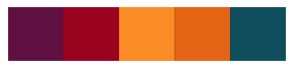

In [103]:
COLOR = 'black'
mpl.rcParams.update({'text.color' : COLOR,
                     'axes.labelcolor' : COLOR,
                     'xtick.color' : COLOR,
                     'ytick.color' : COLOR,
                     'axes.labelsize' : 18,
                     'axes.titlesize' : 18,
                     'xtick.labelsize' : 16,
                     'ytick.labelsize' : 16,
                     'axes.grid' : True,
                     'grid.color' : 'k',
                     'grid.alpha' : 0.4,
                     'grid.linestyle' : ':',
                     'grid.linewidth' : 0.5})

palette = ["#5f0f40","#9a031e","#fb8b24","#e36414","#0f4c5c"]
sns.palplot(sns.color_palette(palette))
plt.show()

In [104]:
def feature_analysis(data, col):
     data[col].value_counts().plot(kind = "pie", autopct = '%1.1f%%', figsize = (10, 10))
     return data[col].value_counts(dropna = False).to_frame(name = f"{col} #").style.bar(subset = f"{col} #", color = palette[4])

# 1 | Problem Definition
- Predict the price of the car based on the features in the dataset. Evaluation based on R2 score.

In [105]:
def Find_Columns(data):
     column_indices = {col: idx for idx, col in enumerate(data.columns)}
     return column_indices
print("The column indices are: ")
Find_Columns(data)

The column indices are: 


{'symboling': 0,
 'normalized-losses': 1,
 'make': 2,
 'fuel-type': 3,
 'aspiration': 4,
 'num-of-doors': 5,
 'body-style': 6,
 'drive-wheels': 7,
 'engine-location': 8,
 'wheel-base': 9,
 'length': 10,
 'width': 11,
 'height': 12,
 'curb-weight': 13,
 'engine-type': 14,
 'num-of-cylinders': 15,
 'engine-size': 16,
 'fuel-system': 17,
 'bore': 18,
 'stroke': 19,
 'compression-ratio': 20,
 'horsepower': 21,
 'peak-rpm': 22,
 'city-mpg': 23,
 'highway-mpg': 24,
 'price': 25}

In [106]:
TARGET = 'price'

In [107]:
def Target_impute(data):
     Target = 'price'
     return Target

def Sample(data):
     return  data.sample(5)

def Info(data):
     return  data.info()

def Null_values(data):
     return data.isnull().sum()

def Descriptive_stats(data):
     return data.describe()

Target_impute(data)
Sample(data)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
124,3,?,plymouth,gas,turbo,two,hatchback,rwd,front,95.9,...,156,spdi,3.59,3.86,7.0,145,5000,19,24,12764
176,-1,65,toyota,gas,std,four,sedan,fwd,front,102.4,...,122,mpfi,3.31,3.54,8.7,92,4200,27,32,10898
49,0,?,jaguar,gas,std,two,sedan,rwd,front,102.0,...,326,mpfi,3.54,2.76,11.5,262,5000,13,17,36000
11,0,192,bmw,gas,std,four,sedan,rwd,front,101.2,...,108,mpfi,3.5,2.8,8.8,101,5800,23,29,16925
178,3,197,toyota,gas,std,two,hatchback,rwd,front,102.9,...,171,mpfi,3.27,3.35,9.3,161,5200,20,24,16558


In [108]:
Info(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [109]:
Null_values(data)

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [110]:
def Find_Missing_Values(data):
     for col in data.columns:
          nums_nan = len(data[data[col] == '?'])
          if  nums_nan > 0:
               print(f"{col} =  {nums_nan}")

Find_Missing_Values(data)

normalized-losses =  41
num-of-doors =  2
bore =  4
stroke =  4
horsepower =  2
peak-rpm =  2
price =  4


In [111]:
def Remove_All(data):
     return f"Data without '?': {len(data[(data != '?').all(axis=1)].index)/len(data.index)*100:.2f}%"

Remove_All(data)     

"Data without '?': 77.56%"

In [112]:
df_copy = data.copy()
cols_to_clean = ["price", "peak-rpm", "horsepower", "stroke", "bore"]
def remove_Nans(data, col):
     data[col] = data[col].replace('?', np.nan)
     data[col] = pd.to_numeric(data[col])
     return data[data[col].notna()]

for col in cols_to_clean:
     df_copy = remove_Nans(df_copy, col)

print(f"Data without '?': {len(df_copy.index) / len(data.index) * 100:.2f}%")

Data without '?': 95.12%


In [113]:
df0 = data.copy() 
col_to_clean = ["price", "peak-rpm", "horsepower", "stroke", "bore"]
def remove_nans(df, col):
    df[col] = df[col].replace('?',np.nan)
    df[col] = pd.to_numeric(df[col])
    return df[df[col].notna()]
     
for col in col_to_clean:
    df0 = remove_nans(df0, col)
    
print(f"Data without '?': {len(df0.index)/len(data.index)*100:.2f}%")
df0.info()

Data without '?': 95.12%
<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          195 non-null    int64  
 1   normalized-losses  195 non-null    object 
 2   make               195 non-null    object 
 3   fuel-type          195 non-null    object 
 4   aspiration         195 non-null    object 
 5   num-of-doors       195 non-null    object 
 6   body-style         195 non-null    object 
 7   drive-wheels       195 non-null    object 
 8   engine-location    195 non-null    object 
 9   wheel-base         195 non-null    float64
 10  length             195 non-null    float64
 11  width              195 non-null    float64
 12  height             195 non-null    float64
 13  curb-weight        195 non-null    int64  
 14  engine-type        195 non-null    object 
 15  num-of-cylinders   195 non-null    object 
 16  e

In [114]:
Descriptive_stats(data).T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.0,0.0,1.0,2.0,3.0
wheel-base,205.0,98.756585,6.021776,86.6,94.5,97.0,102.4,120.9
length,205.0,174.049268,12.337289,141.1,166.3,173.2,183.1,208.1
width,205.0,65.907805,2.145204,60.3,64.1,65.5,66.9,72.3
height,205.0,53.724878,2.443522,47.8,52.0,54.1,55.5,59.8
curb-weight,205.0,2555.565854,520.680204,1488.0,2145.0,2414.0,2935.0,4066.0
engine-size,205.0,126.907317,41.642693,61.0,97.0,120.0,141.0,326.0
compression-ratio,205.0,10.142537,3.972040,7.0,8.6,9.0,9.4,23.0
city-mpg,205.0,25.219512,6.542142,13.0,19.0,24.0,30.0,49.0
highway-mpg,205.0,30.751220,6.886443,16.0,25.0,30.0,34.0,54.0


In [115]:
data.sample(10).T

,68,152,88,50,178,79,161,70,129,167
symboling,-1,1,-1,1,3,1,0,-1,1,2
normalized-losses,93,74,137,104,197,161,91,93,?,134
make,mercedes-benz,toyota,mitsubishi,mazda,toyota,mitsubishi,toyota,mercedes-benz,porsche,toyota
fuel-type,diesel,gas,gas,gas,gas,gas,gas,diesel,gas,gas
aspiration,turbo,std,std,std,std,turbo,std,turbo,std,std
num-of-doors,four,four,four,two,two,two,four,four,two,two
body-style,wagon,hatchback,sedan,hatchback,hatchback,hatchback,hatchback,sedan,hatchback,hardtop
drive-wheels,rwd,fwd,fwd,fwd,rwd,fwd,fwd,rwd,rwd,rwd
engine-location,front,front,front,front,front,front,front,front,front,front
wheel-base,110.0,95.7,96.3,93.1,102.9,93.0,95.7,115.6,98.4,98.4


In [116]:
data.describe(include= 'object').T

,count,unique,top,freq
normalized-losses,205,52,?,41
make,205,22,toyota,32
fuel-type,205,2,gas,185
aspiration,205,2,std,168
num-of-doors,205,3,four,114
body-style,205,5,sedan,96
drive-wheels,205,3,fwd,120
engine-location,205,2,front,202
engine-type,205,7,ohc,148
num-of-cylinders,205,7,four,159


,make #
toyota,32
nissan,18
mazda,17
mitsubishi,13
honda,13
volkswagen,12
subaru,12
peugot,11
volvo,11
dodge,9


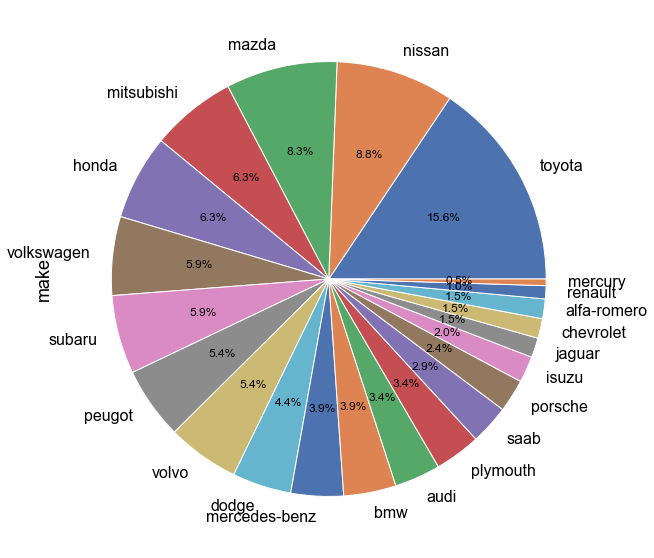

In [117]:
feature_analysis(data, 'make')

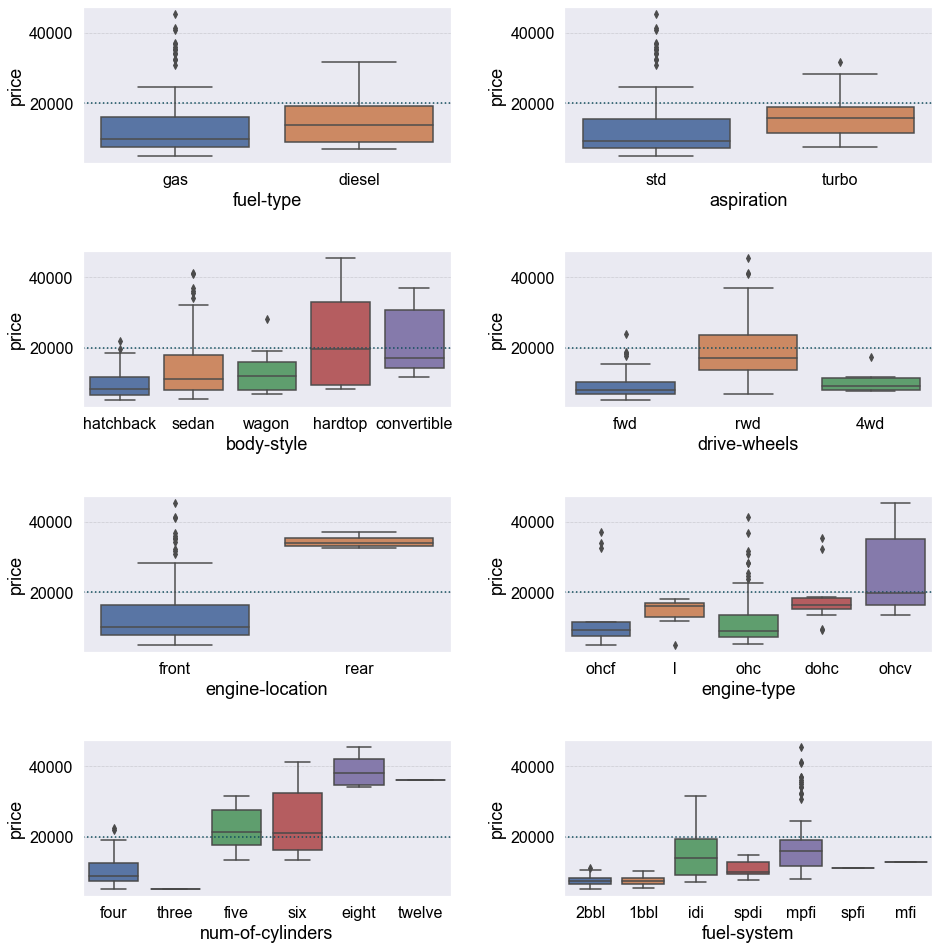

In [118]:
plt.figure(figsize=(14,14))
for index, feature in enumerate(df0.describe(include=object).T.index[1:].drop(['make', 'num-of-doors'])):
    plt.subplot(4, 2, index+1)
    plt.tight_layout(pad=3.0)
    plt.axhline(y = 20_000, color = palette[4], linestyle = ':' )
    sns.boxplot(x=feature, y="price", data=pd.concat([df0['price'], df0[feature]], axis=1).sort_values(by = "price"))
    
plt.show()

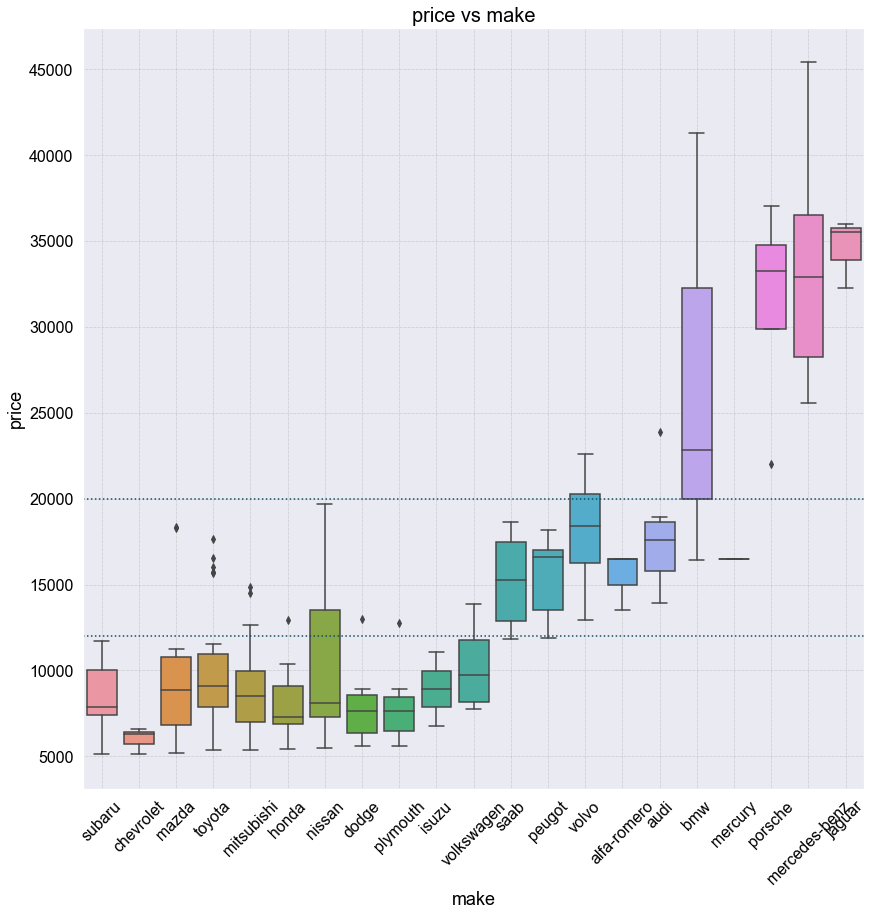

In [119]:
_, ax = plt.subplots(figsize=(14, 14))

sns.boxplot(x='make', y="price", data=pd.concat([df0['price'], df0['make']], axis=1).sort_values(by = "price"))
ax.axhline(y = 20_000, color = palette[4], linestyle = ':' )
ax.axhline(y = 12_000, color = palette[4], linestyle = ':' )
plt.grid(True, alpha = 0.4, linestyle = ':')
plt.xticks(rotation=45)
plt.title("price vs make", fontsize = 20)
plt.show()

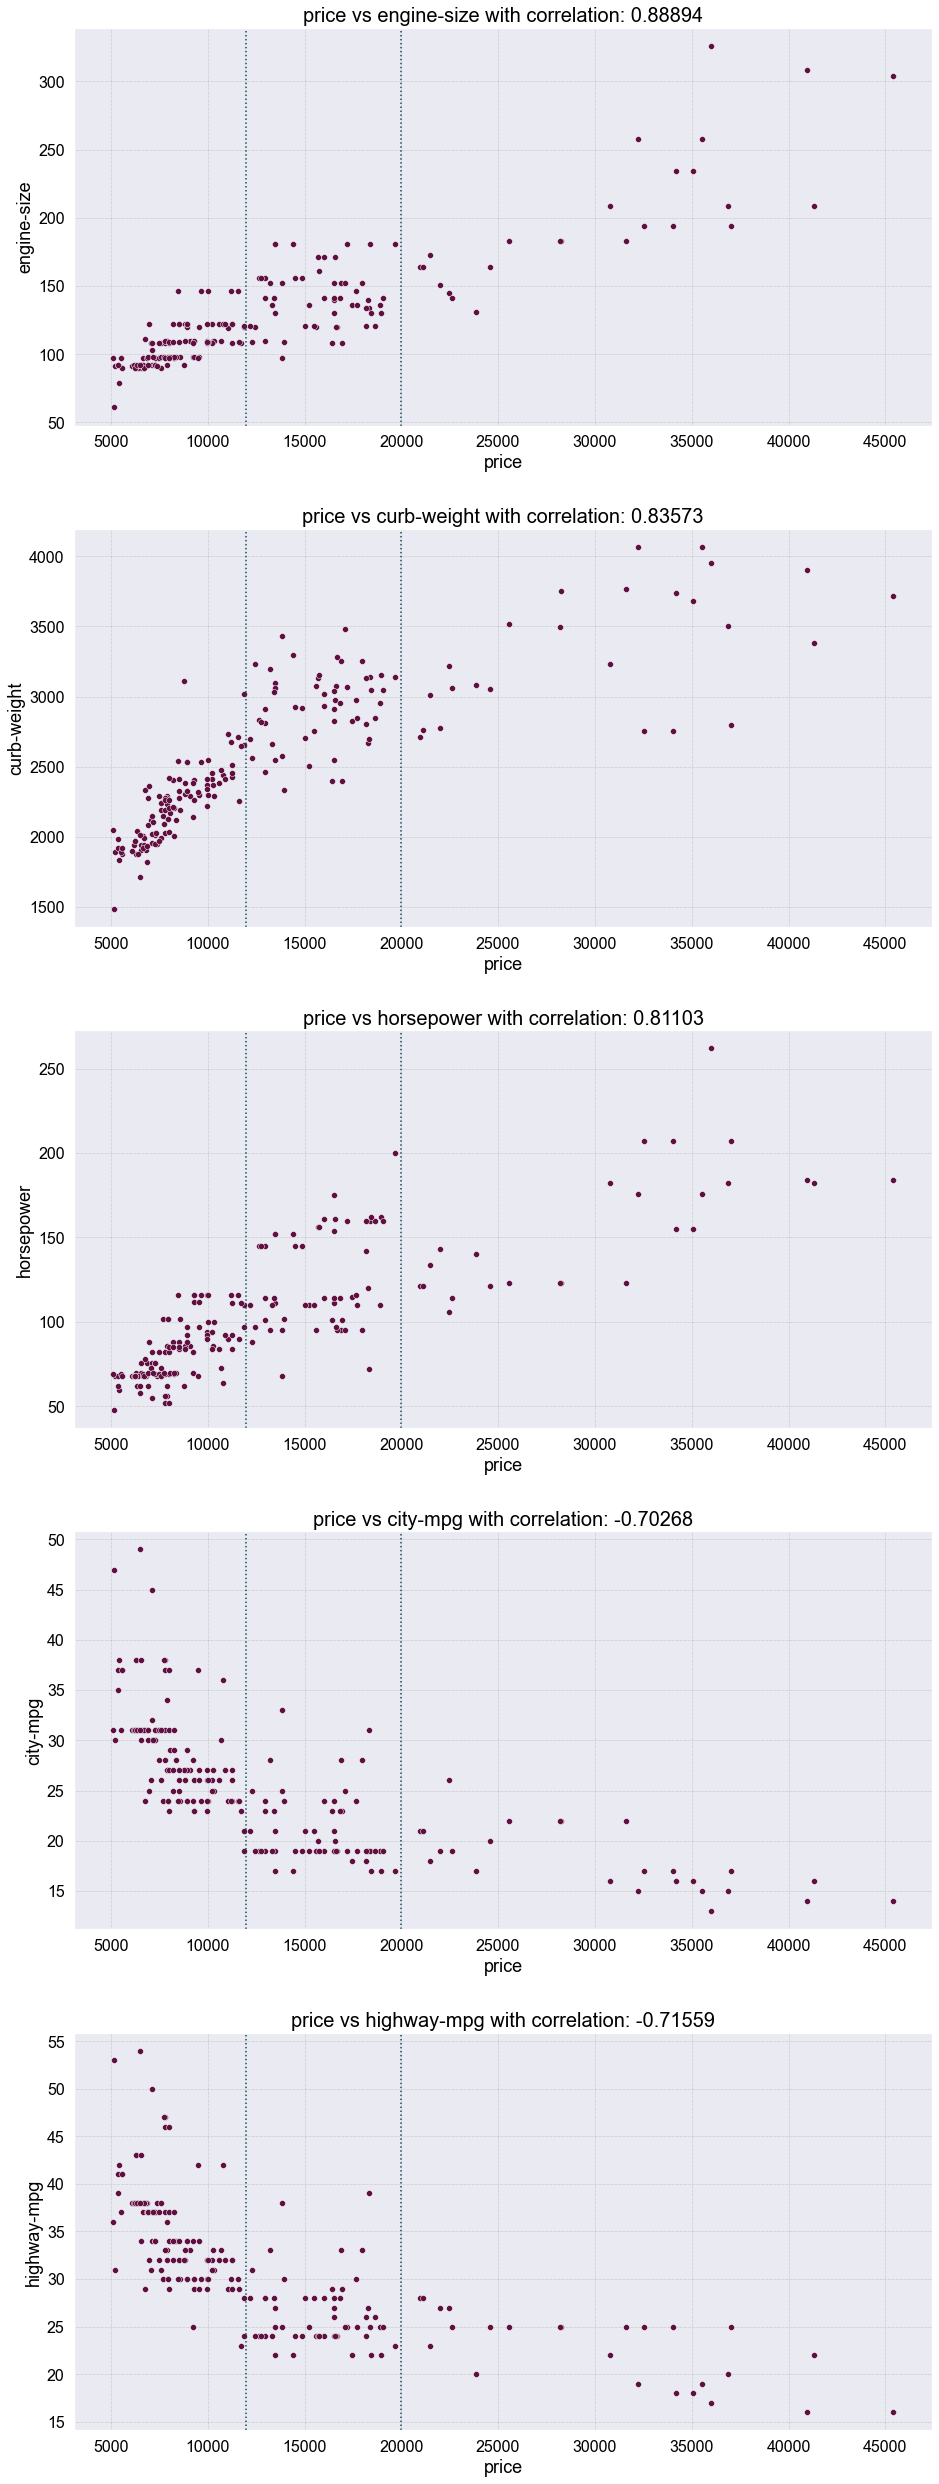

In [120]:
plt.figure(figsize=(14,35))
high_corr_col = ["engine-size", "curb-weight", "horsepower", "city-mpg", "highway-mpg"]

for index, (feature, corr_feature) in enumerate(zip(high_corr_col, df0.select_dtypes(include=np.number).corr()['price'].sort_values(ascending=False).to_frame().T[["engine-size", "curb-weight", "horsepower", "city-mpg", "highway-mpg"]].values[0])):
    plt.subplot(len(high_corr_col), 1, index+1)
    plt.tight_layout(pad=3.0)
    plt.title(f"price vs {feature} with correlation: {corr_feature:.5f}", fontsize = 20)
    plt.axvline(x = 12_000, color = palette[4], linestyle = ':' )
    plt.axvline(x = 20_000, color = palette[4], linestyle = ':' )
    plt.grid(True, alpha = 0.4, linestyle = ':')
    sns.scatterplot(data=df0, x='price', y=feature, color = palette[0])
    
plt.show()

# Correlation between numerical features

In [121]:
df_all_corr = df0.corr().abs().unstack().sort_values(kind='quicksort', ascending=False).reset_index()
df_all_corr.rename(columns={"level_0": "Feature 1", "level_1":"Feature 2", 0:"Correlation_Coefficient"}, inplace=True)
df_all_corr[df_all_corr['Feature 1'] == 'price']

,Feature 1,Feature 2,Correlation_Coefficient
14,price,price,1.000000
18,price,engine-size,0.888942
31,price,curb-weight,0.835729
42,price,horsepower,0.811027
50,price,width,0.754273
58,price,highway-mpg,0.715590
62,price,city-mpg,0.702685
64,price,length,0.695331
85,price,wheel-base,0.585793
97,price,bore,0.546873


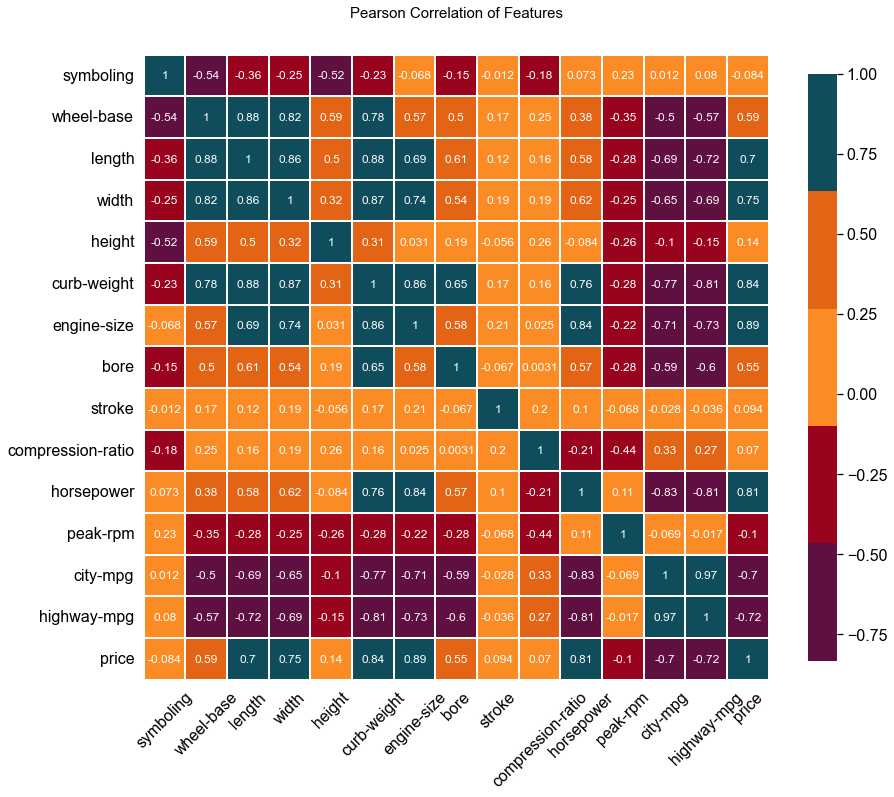

In [122]:
_ , ax = plt.subplots(figsize =(14, 12))

_ = sns.heatmap(
    df0.corr(), 
    cmap = palette,
    square=True, 
    cbar_kws={'shrink':.9 }, 
    ax=ax,
    annot=True, 
    linewidths=0.1,vmax=1.0, linecolor='white',
    annot_kws={'fontsize':12 }
)

plt.title('Pearson Correlation of Features', y=1.05, size=15)

plt.xticks(rotation=45)
plt.show()

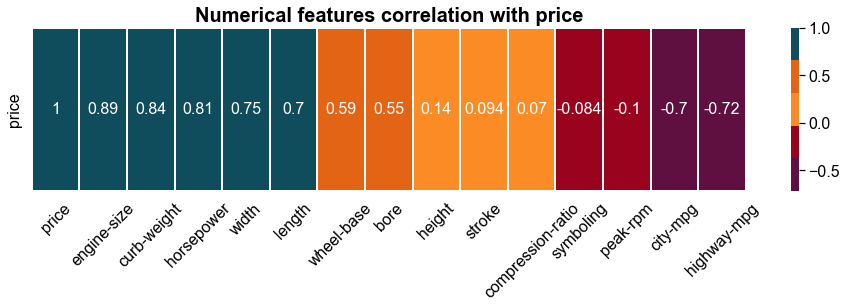

In [123]:
_,ax = plt.subplots(figsize=(16,3))
sns.heatmap(df0.select_dtypes(include=np.number).corr()['price'].sort_values( ascending=False).to_frame().T, 
            cmap = palette,
            annot=True, 
            linewidths=0.1,vmax=1.0, linecolor='white',
            annot_kws={'fontsize':16 }
)

plt.title("Numerical features correlation with price", weight='bold', fontsize=20)
plt.xticks(rotation=45)
plt.show()

# Initial Model Hypothesis
- Problem Type : Regression
- Machine Learning Regression Algorithms:
- Linear Regression
- Polynomial Regression
- Lasso Regression
- Decision Tree Regression
- Random Forest Regression
- Gaussian  Process Regression


In [126]:
def Model_columns(df0):
     model_col = [TARGET, 'engine-size', 'curb-weight',
                  'horsepower', 'city-mpg', 'highway-mpg', 'make'
                  ]
     df_model =  df0[model_col].copy()
     df_model = df_model.sample(10).T
     return df_model

Ans =  Model_columns(df0)
Ans



,179,154,72,123,13,74,198,172,62,11
price,15998.0,7898.0,35056.0,8921.0,21105.0,45400.0,18420.0,17669.0,10245.0,16925.0
engine-size,171,92,234,122,164,304,130,146,122,108
curb-weight,3016,2290,3685,2535,2765,3715,3045,2975,2410,2395
horsepower,161,62,155,88,121,184,162,116,84,101
city-mpg,19,27,16,24,21,14,17,24,26,23
highway-mpg,24,32,18,30,28,16,22,30,32,29
make,toyota,toyota,mercedes-benz,plymouth,bmw,mercedes-benz,volvo,toyota,mazda,bmw


In [129]:
model_col = [TARGET, "engine-size", "curb-weight", "horsepower", "city-mpg", "highway-mpg", "make"]
df_model = df0[model_col].copy()
df_model.sample(10).T

,35,101,115,161,37,134,200,54,195,83
price,7295.0,13499.0,16630.0,8358.0,7895.0,15040.0,16845.0,7395.0,13415.0,14869.0
engine-size,92,181,120,98,110,121,141,91,141,156
curb-weight,2010,3095,3075,2122,2236,2707,2952,1950,3034,2921
horsepower,76,152,97,70,86,110,114,68,114,145
city-mpg,30,17,19,28,27,21,23,31,23,19
highway-mpg,34,22,24,34,33,28,28,38,28,24
make,honda,nissan,peugot,toyota,honda,saab,volvo,mazda,volvo,mitsubishi


# Train Test Split

In [130]:
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(
    df_model.drop([TARGET], axis=1), 
    df_model[TARGET], 
    test_size = 0.20, 
    random_state = 0xBEEF
)

X_train_wout = X_train_w.copy().drop(["make"], axis=1)
X_test_wout = X_test_w.copy().drop(["make"], axis=1)
y_train_wout = y_train_w.copy()
y_test_wout = y_test_w.copy()

X_train_wout.shape

(156, 5)